# Imports

In [1]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into

In [1]:
import os
import re
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from google.colab import files
#from codecarbon import track_emissions
from codecarbon import EmissionsTracker
from datetime import datetime

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(cv2.__version__)

4.11.0


# Video-to-frame sequence transformation

In [2]:
# Make directory
dir = "initial_frames"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
# Check if the video is correct by reading one frame (a frame should not be empty and its values should be printed)
# Pass in a custom video
vidcap = cv2.VideoCapture("/content/Interlace_.mp4")
success, frame = vidcap.read()
frame

In [ ]:
# Read the entire video
count = 0
success = True
while success:
    success, frame = vidcap.read()
    filename = os.path.join("/content/initial_frames/" + "frame%d.jpg" % count)
    try:
        cv2.imwrite(filename, frame) # save frame as JPEG file
    except:
        continue
    count += 1

In [ ]:
# Get frames
path = "/content/initial_frames"
imgs = os.listdir(path)
images = []
for img in imgs:
    images.append(img)

In [ ]:
# Sort the frames
sorted_images = []
for i, name in enumerate(images):
    for j, name_j in enumerate(images):
        extracted_number = re.findall(r'\d+', name_j)
        if int(extracted_number[0]) == i:
            sorted_images.append(name_j)

In [ ]:
# Take every 10th frame
reduced_sorted_images = []
for i, item in enumerate(sorted_images):

    if (i % 10) == 0:
        reduced_sorted_images.append(item)

In [ ]:
# Create a directory for a reduced quantity of frames
parent_dir = "/content/"
dir = "original_frames"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
# Change frames name for Unreal Engine to 0001 format
for num, frame in enumerate(reduced_sorted_images):
    rgbImage = cv2.imread('/content/initial_frames/' + frame);

    # Optimize name
    if num < 10:
        file_name = "00" + str(num) + ".jpg"
    elif num >= 10 and num < 100:
        file_name = "0" + str(num) + ".jpg"
    else:
        file_name = str(num) + ".jpg"


    # Save
    os.chdir("/content/original_frames")
    cv2.imwrite(file_name, rgbImage)

In [ ]:
!zip -r /content/original_frames.zip /content/original_frames/

# Apply filtering

## One frame test

### Separate colour channels, reshape and normalize

In [ ]:
# Read an original RGB image.
rgbImage = cv2.imread('/content/017.jpg');
rgbImage.shape

(1080, 1920, 3)

In [ ]:
# Extract colour channels.
redChannel = rgbImage[:,:,0] # red channel
greenChannel = rgbImage[:,:,1] # green channel
blueChannel = rgbImage[:,:,2] # blue channel

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

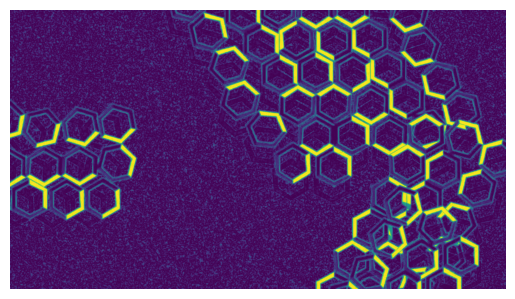

In [ ]:
plt.imshow(redChannel)
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

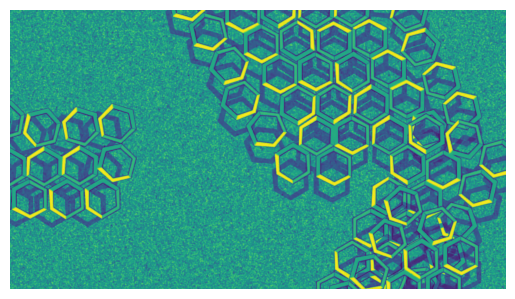

In [ ]:
plt.imshow(greenChannel)
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

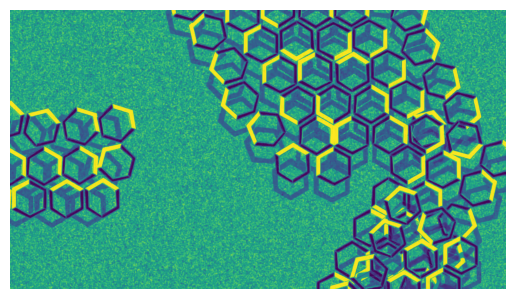

In [ ]:
plt.imshow(blueChannel)
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

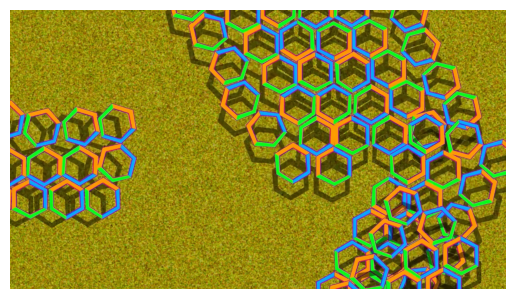

In [ ]:
# Merge all 3
image_merged = cv2.merge([blueChannel, greenChannel, redChannel])
plt.imshow(image_merged)
plt.axis("off")

In [ ]:
# Transform to NumPy array
import numpy as np

redChannel_np = np.array(redChannel)
greenChannel_np = np.array(greenChannel)
blueChannel_np = np.array(blueChannel)

redChannel_np

array([[18, 18, 18, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  7,  2,  3],
       [ 0,  0,  0, ..., 14,  8,  9],
       ...,
       [18, 28, 32, ...,  0,  2,  5],
       [18, 27, 32, ...,  0,  0,  3],
       [19, 27, 33, ...,  0,  0,  1]], dtype=uint8)

In [ ]:
# Reshape and normalize
redChannel_reshaped_normalized = redChannel_np.reshape(-1)/255
greenChannel_reshaped_normalized = greenChannel_np.reshape(-1)/255
blueChannel_reshaped_normalized = blueChannel_np.reshape(-1)/255

redChannel_reshaped_normalized

array([0.07058824, 0.07058824, 0.07058824, ..., 0.        , 0.        ,
       0.00392157])

### Define functions

In [ ]:
def current2firing_time(x, tau=20, threshold=0.2, maxtime=100.0, epsilon=1e-7):
    """ Computes first firing time latency for a current input x assuming the charge time of a current based LIF neuron.

    Args:
    x -- The "current" values

    Keyword args:
    tau -- The membrane time constant of the LIF neuron to be charged
    threshold -- The firing thresholdeshold value
    timemax -- The maximum time returned
    epsilon -- A generic (small) epsilon > 0

    Returns:
    Time to first spike for each "current" x
    """
    idx = x < threshold # discard values than do not pass the threshold for the index array
    x = np.clip(x, threshold + epsilon, 1e9) # clip the initial pixel values
    T = tau * np.log(x/(x - threshold))
    T[idx] = maxtime
    return T

In [ ]:
def filter_by_firing_times(image_to_filter, firing_times, threshold=None):
    """ Filters frame pixel data based on computed first firing time latency.

    Args:
    image_to_filter -- a single frame to filter
    firing_times -- the output of the current2firing_time function
    threshold -- time filtering parameter, decides after what time the pixel information is discarded

    Returns:
    filtered frame
    """
    # Create a copy so that transformation does not affec the original image
    copied_image = image_to_filter.copy()

    # Discard the firing times below threshold
    if threshold is not None:
        firing_times[firing_times > threshold] = 100

        # Create placeholder array for the mask
        zeros = np.zeros_like(firing_times)
        placeholder_arr = zeros + 100

        # Create the mask, where True covers the value to filter out (==100)
        mask = placeholder_arr == blueChannel_firing_times # create a mask using filtered by threshold firing times

        # Zero out all True values
        copied_image[mask] = 0
    else:
        mask = image_to_filter < firing_times # create mask
        copied_image[mask] = 0

    return copied_image

### Apply functions to one colour channel

In [ ]:
# Get firing times
redChannel_firing_times = current2firing_time(redChannel_reshaped_normalized, tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)

In [ ]:
# Look into firing time values received
np.sort(np.unique(redChannel_firing_times))

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

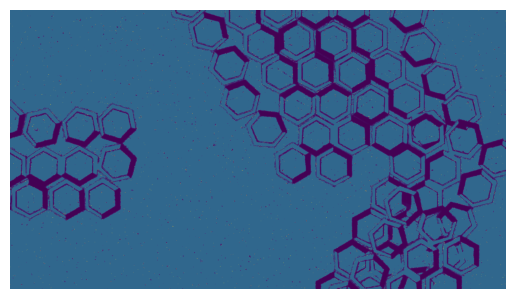

In [ ]:
plt.imshow(redChannel_firing_times.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

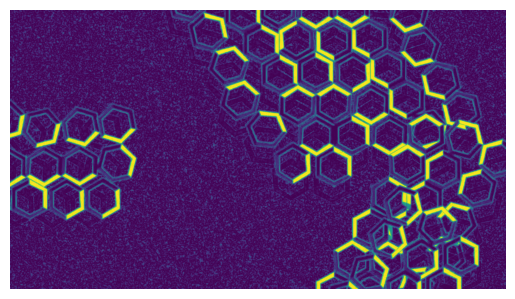

In [ ]:
plt.imshow(redChannel_np.reshape(1080, 1920))
plt.axis("off")

In [ ]:
# Generate time units for raster plot
nb_units = redChannel_firing_times.shape[0]
units = np.arange(nb_units)
print(nb_units)
print(units)

2073600
[      0       1       2 ... 2073597 2073598 2073599]


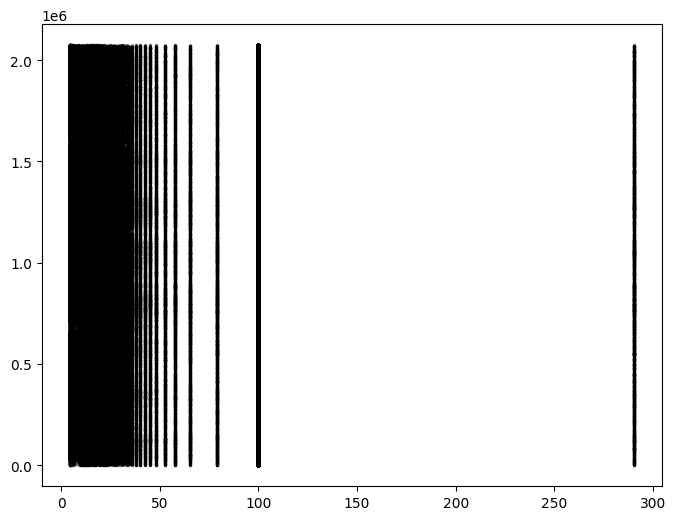

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
ax.scatter(redChannel_firing_times, units, color="k", alpha=0.22, s=2)
plt.show()

In [ ]:
# Apply mask to a red colour channel
filtered_red = filter_by_firing_times(redChannel_np.reshape(-1), redChannel_firing_times)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

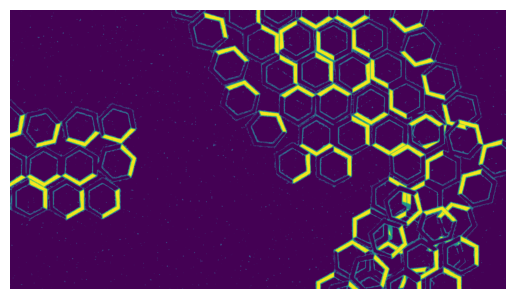

In [ ]:
# Filtered with the spiking mask
plt.imshow(filtered_red.reshape(1080, 1920))
plt.axis("off")

In [ ]:
# Get firing times
blueChannel_firing_times = current2firing_time(blueChannel_reshaped_normalized, tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)

In [ ]:
# Look into firing time values received
np.sort(np.unique(blueChannel_firing_times))

In [ ]:
# Apply mask to a blue colour channel
filtered_blue = filter_by_firing_times(blueChannel_np.reshape(-1), blueChannel_firing_times)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

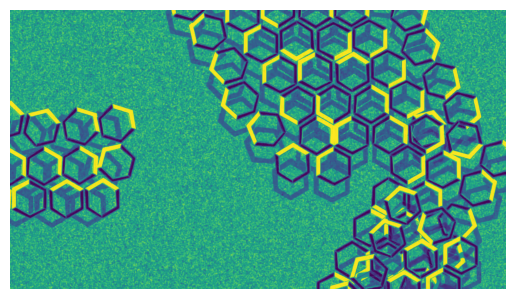

In [ ]:
plt.imshow(blueChannel_np)
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

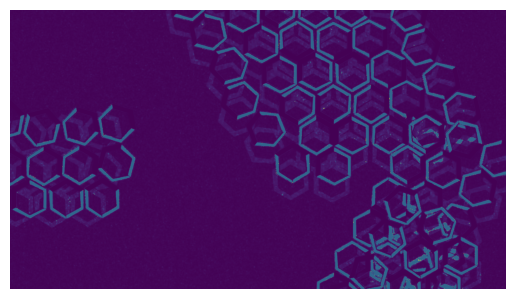

In [ ]:
plt.imshow(blueChannel_firing_times.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

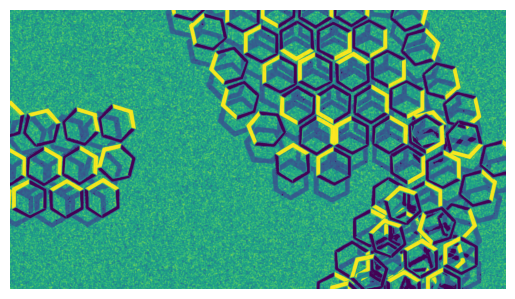

In [ ]:
plt.imshow(filtered_blue.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

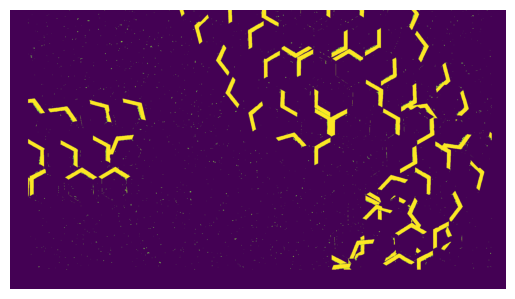

In [ ]:
## Remove background and compare with the spiking mask filtering

blueChannel[blueChannel < 200] = 0
plt.imshow(blueChannel)
plt.axis("off")

### Apply functions to all colour channels

In [ ]:
# Get firing times
redChannel_firing_times = current2firing_time(redChannel_reshaped_normalized, tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
greenChannel_firing_times = current2firing_time(greenChannel_reshaped_normalized, tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
blueChannel_firing_times = current2firing_time(blueChannel_reshaped_normalized, tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)

firing_times = []
firing_times.append(redChannel_firing_times)
firing_times.append(greenChannel_firing_times)
firing_times.append(blueChannel_firing_times)

In [ ]:
# Apply mask to all colour channels

filtered_red = filter_by_firing_times(redChannel_np.reshape(-1), firing_times[0])
filtered_green = filter_by_firing_times(greenChannel_np.reshape(-1), firing_times[1])
filtered_blue = filter_by_firing_times(blueChannel_np.reshape(-1), firing_times[2])

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

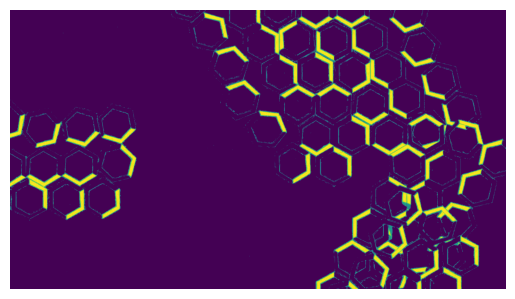

In [ ]:
# Filtered red with the spiking mask
plt.imshow(filtered_red.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

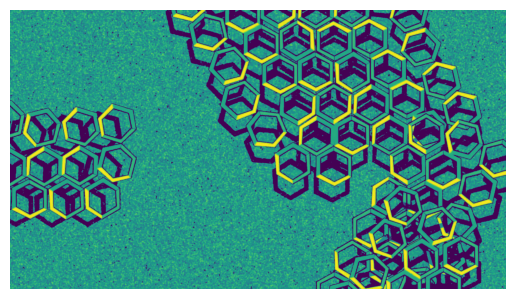

In [ ]:
# Filtered green with the spiking mask
plt.imshow(filtered_green.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

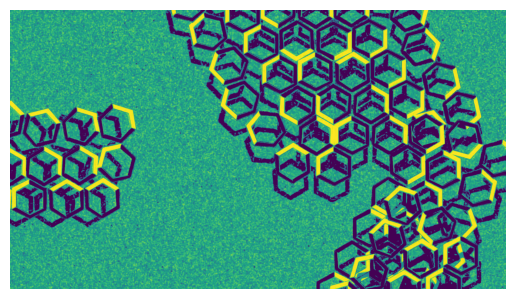

In [ ]:
# Filtered blue with the spiking mask
plt.imshow(filtered_blue.reshape(1080, 1920))
plt.axis("off")

In [ ]:
# Apply mask with threshold to all colour channels

filtered_thr_red = filter_by_firing_times(redChannel_np.reshape(-1), firing_times[0], 50)
filtered_thr_green = filter_by_firing_times(greenChannel_np.reshape(-1), firing_times[1], 10)
filtered_thr_blue = filter_by_firing_times(blueChannel_np.reshape(-1), firing_times[2], 5)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

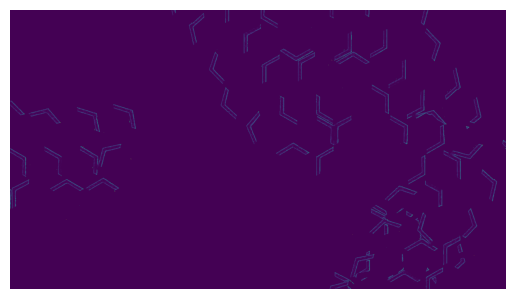

In [ ]:
# Filtered red with threshold
plt.imshow(filtered_thr_red.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

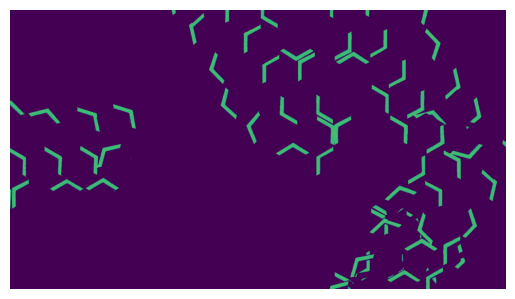

In [ ]:
# Filtered green with threshold
plt.imshow(filtered_thr_green.reshape(1080, 1920))
plt.axis("off")

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

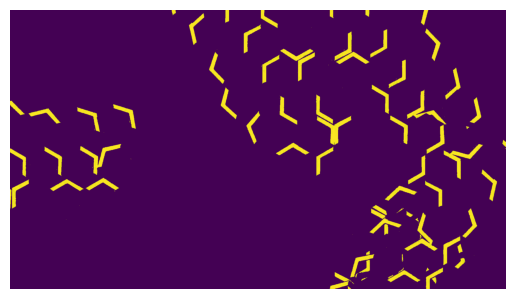

In [ ]:
# Filtered blue with threshold
plt.imshow(filtered_thr_blue.reshape(1080, 1920))
plt.axis("off")

In [ ]:
# Merge all 3 original
image_original = cv2.merge([redChannel, greenChannel, blueChannel])
filename = '/content/original.jpg'
cv2.imwrite(filename, image_original)

True

In [ ]:
# Merge all 3 filtered
image_filtered = cv2.merge([filtered_red.reshape(1080, 1920), filtered_green.reshape(1080, 1920), filtered_blue.reshape(1080, 1920)])
filename = '/content/filtered.jpg'
cv2.imwrite(filename, image_filtered)

True

In [ ]:
# Merge all 3 filtered with threshold
image_filtered_thr = cv2.merge([filtered_thr_red.reshape(1080, 1920), filtered_thr_green.reshape(1080, 1920), filtered_thr_blue.reshape(1080, 1920)])
filename = '/content/filtered_thr.jpg'
cv2.imwrite(filename, image_filtered_thr)

True

In [ ]:
# Remove the background from each channel
redChannel[redChannel < 80] = 0
greenChannel[greenChannel < 200] = 0
blueChannel[blueChannel < 230] = 0

In [ ]:
# Merge all 3 backgroundless
image_backgroundless = cv2.merge([redChannel, greenChannel, blueChannel])
filename = '/content/backgroundless.jpg'
cv2.imwrite(filename, image_backgroundless)

True

## Bulk processing

In [ ]:
def current2firing_time(x, tau=20, threshold=0.2, maxtime=100.0, epsilon=1e-7):
    """ Computes first firing time latency for a current input x assuming the charge time of a current based LIF neuron.

    Args:
    x -- The "current" values

    Keyword args:
    tau -- The membrane time constant of the LIF neuron to be charged
    threshold -- The firing thresholdeshold value
    timemax -- The maximum time returned
    epsilon -- A generic (small) epsilon > 0

    Returns:
    Time to first spike for each "current" x
    """
    idx = x < threshold # discard values than do not pass the threshold for the index array
    x = np.clip(x, threshold + epsilon, 1e9) # clip the initial pixel values
    T = tau * np.log(x/(x - threshold))
    T[idx] = maxtime
    return T

In [ ]:
def filter_by_mask_new(image_to_filter, mask_image):
    """ Filters frame pixel data based on computed first firing time latency.

    Args:
    image_to_filter -- a single frame to filter
    mask_image -- the output of the current2firing_time function

    Returns:
    filtered frame
    """
    mask = image_to_filter < mask_image # create mask
    image_to_filter[mask] = 0
    return image_to_filter

In [ ]:
dir = "masked_frames"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
!zip -r /content/masked_frames.zip /content/masked_frames/

In [ ]:
dir = "masked_frames_backgroundless"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
!zip -r /content/masked_frames_backgroundless.zip /content/masked_frames_backgroundless/

In [ ]:
dir = "frames_backgroundless"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
!zip -r /content/frames_backgroundless.zip /content/frames_backgroundless/

In [ ]:
# Backgroundless only

# Initialise and start CodeCarbon tracker
tracker = EmissionsTracker()
tracker.start()

start_time = datetime.now()
print(f'Start time is {start_time}')

for num, frame in enumerate(reduced_sorted_images):
    rgbImage = cv2.imread('/content/initial_frames/' + frame);

    # Separate to 3 colour channels
    three_colour_image = []
    original_image_channeled = []
    for i in range(3):
        three_colour_image.append(np.array(rgbImage[:,:,i]))
        original_image_channeled.append(np.array(rgbImage[:,:,i]))

    # Remove the background, normalize and reshape
    cleaned_image = []
    for i, colour_channel in enumerate(three_colour_image):
        if i == 0:
            colour_channel[colour_channel < 80] = 0 # red channel
            cleaned_image.append(colour_channel)
        elif i == 1:
            colour_channel[colour_channel < 200] = 0 # green channel
            cleaned_image.append(colour_channel)
        elif i == 2:
            colour_channel[colour_channel < 230] = 0 # blue channel
            cleaned_image.append(colour_channel) # flatten and normalize

    # Merge all 3 filtered
    image_filtered = cv2.merge([cleaned_image[0], cleaned_image[1], cleaned_image[2]])

    # Optimize name
    if num < 10:
        file_name = "00" + str(num) + ".jpg"
    elif num >= 10 and num < 100:
        file_name = "0" + str(num) + ".jpg"
    else:
        file_name = str(num) + ".jpg"

    # Save
    os.chdir("/content/frames_backgroundless")
    cv2.imwrite(file_name, image_filtered)


# Stop CO2 tracker and print emissions
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

# Calculate the time spent
stop_time = datetime.now() - start_time
print(stop_time)

[codecarbon WARNING @ 16:47:34] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:47:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:47:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:47:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 16:47:36] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 16:47:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 16:47:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:47:36] [setup] GPU Tracking...
[codecarbon INFO @ 16:47:36] No GPU found.
[codecarbon INFO @ 16:47:36] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Start time is 2025-05-25 16:47:36.466305


[codecarbon INFO @ 16:47:51] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:47:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:47:51] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 16:47:51] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:54] Energy consumed for RAM : 0.000051 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:47:54] Delta energy consumed for CPU with constant : 0.000040 kWh, power : 42.5 W
[codecarbon INFO @ 16:47:54] Energy consumed for All CPU : 0.000217 kWh
[codecarbon INFO @ 16:47:54] 0.000268 kWh of electricity used since the beginning.


Emissions: 0.00012129434585998308 kg
0:00:18.397322


In [ ]:
stop_time

datetime.timedelta(seconds=18, microseconds=397322)

In [ ]:
# New masking applied plus backgroundless

# Initialise and start CodeCarbon tracker
tracker = EmissionsTracker()
tracker.start()

start_time = datetime.now()
print(f'Start time is {start_time}')

for num, frame in enumerate(reduced_sorted_images):
    rgbImage = cv2.imread('/content/initial_frames/' + frame);

    # Separate to 3 colour channels
    three_colour_image = []
    original_image_channeled = []
    for i in range(3):
        three_colour_image.append(np.array(rgbImage[:,:,i]))
        original_image_channeled.append(np.array(rgbImage[:,:,i]))

    # Remove the background, normalize and reshape
    cleaned_image = []
    for i, colour_channel in enumerate(three_colour_image):
        if i == 0:
            colour_channel[colour_channel < 80] = 0 # red channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 1:
            colour_channel[colour_channel < 200] = 0 # green channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 2:
            colour_channel[colour_channel < 230] = 0 # blue channel
            cleaned_image.append(colour_channel.reshape(-1)/255) # flatten and normalize

    # Get firing times
    redChannel_firing_times = current2firing_time(cleaned_image[0], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
    greenChannel_firing_times = current2firing_time(cleaned_image[1], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
    blueChannel_firing_times = current2firing_time(cleaned_image[2], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)

    firing_times = []
    firing_times.append(redChannel_firing_times)
    firing_times.append(greenChannel_firing_times)
    firing_times.append(blueChannel_firing_times)

    # Apply mask to all colour channels
    filtered_red = filter_by_mask_new(three_colour_image[0].reshape(-1), firing_times[0])
    filtered_green = filter_by_mask_new(three_colour_image[1].reshape(-1), firing_times[1])
    filtered_blue = filter_by_mask_new(three_colour_image[2].reshape(-1), firing_times[2])

    # Merge all 3 filtered
    image_filtered = cv2.merge([filtered_red.reshape(1080, 1920), filtered_green.reshape(1080, 1920), filtered_blue.reshape(1080, 1920)])

    # Optimize name
    if num < 10:
        file_name = "00" + str(num) + ".jpg"
    elif num >= 10 and num < 100:
        file_name = "0" + str(num) + ".jpg"
    else:
        file_name = str(num) + ".jpg"

    # Save
    #os.chdir("/content/masked_frames")
    os.chdir("/content/masked_frames_backgroundless")
    cv2.imwrite(file_name, image_filtered)

# Stop CO2 tracker and print emissions
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

# Calculate the time spent
stop_time = datetime.now() - start_time
print(stop_time)

[codecarbon WARNING @ 16:49:48] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:49:48] [setup] RAM Tracking...
[codecarbon INFO @ 16:49:48] [setup] CPU Tracking...
[codecarbon WARNING @ 16:49:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 16:49:49] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 16:49:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 16:49:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:49:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:49:49] No GPU found.
[codecarbon INFO @ 16:49:49] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Start time is 2025-05-25 16:49:49.894009


[codecarbon INFO @ 16:50:04] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:50:04] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:50:04] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 16:50:04] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:50:19] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:50:19] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:50:19] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 16:50:19] 0.000438 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:50:34] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:50:34] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:50:34] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 16:50:34] 0.000656 kWh 

Emissions: 0.0004852960617050959 kg
0:01:13.547519


In [ ]:
print(stop_time)

0:01:13.547519


In [ ]:
# New masking applied

# Initialise and start CodeCarbon tracker
tracker = EmissionsTracker()
tracker.start()

start_time = datetime.now()
print(f'Start time is {start_time}')

for num, frame in enumerate(reduced_sorted_images):
    rgbImage = cv2.imread('/content/initial_frames/' + frame);

    # Separate to 3 colour channels
    three_colour_image = []
    original_image_channeled = []
    for i in range(3):
        three_colour_image.append(np.array(rgbImage[:,:,i]))
        original_image_channeled.append(np.array(rgbImage[:,:,i]))

    # Remove the background, normalize and reshape
    cleaned_image = []
    for i, colour_channel in enumerate(three_colour_image):
        if i == 0:
            #colour_channel[colour_channel < 80] = 0 # red channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 1:
            #colour_channel[colour_channel < 200] = 0 # green channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 2:
            #colour_channel[colour_channel < 230] = 0 # blue channel
            cleaned_image.append(colour_channel.reshape(-1)/255) # flatten and normalize

    # Get firing times
    redChannel_firing_times = current2firing_time(cleaned_image[0], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
    greenChannel_firing_times = current2firing_time(cleaned_image[1], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)
    blueChannel_firing_times = current2firing_time(cleaned_image[2], tau=20, threshold=0.2, maxtime=100, epsilon=1e-7)

    firing_times = []
    firing_times.append(redChannel_firing_times)
    firing_times.append(greenChannel_firing_times)
    firing_times.append(blueChannel_firing_times)

    # Apply mask to all colour channels
    filtered_red = filter_by_mask_new(three_colour_image[0].reshape(-1), firing_times[0])
    filtered_green = filter_by_mask_new(three_colour_image[1].reshape(-1), firing_times[1])
    filtered_blue = filter_by_mask_new(three_colour_image[2].reshape(-1), firing_times[2])

    # Merge all 3 filtered
    image_filtered = cv2.merge([filtered_red.reshape(1080, 1920), filtered_green.reshape(1080, 1920), filtered_blue.reshape(1080, 1920)])

    # Optimize name
    if num < 10:
        file_name = "00" + str(num) + ".jpg"
    elif num >= 10 and num < 100:
        file_name = "0" + str(num) + ".jpg"
    else:
        file_name = str(num) + ".jpg"

    # Save
    os.chdir("/content/masked_frames")
    cv2.imwrite(file_name, image_filtered)

# Stop CO2 tracker and print emissions
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

# Calculate the time spent
stop_time = datetime.now() - start_time
print(stop_time)

[codecarbon WARNING @ 16:54:02] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:54:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:54:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:54:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 16:54:03] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 16:54:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 16:54:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:54:03] [setup] GPU Tracking...
[codecarbon INFO @ 16:54:03] No GPU found.
[codecarbon INFO @ 16:54:03] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Start time is 2025-05-25 16:54:03.670950


[codecarbon INFO @ 16:54:18] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:54:18] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:54:18] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 16:54:18] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:54:33] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:54:33] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:54:33] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 16:54:33] 0.000437 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:54:48] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:54:48] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:54:48] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 16:54:48] 0.000656 kWh 

Emissions: 0.000449738717771582 kg
0:01:08.184841


In [ ]:
def sparse_data_generator(X, y, batch_size, nb_steps, nb_units, shuffle=False):
    """ This generator takes datasets in analog format and generates spiking network input as sparse tensors.

    Args:
        X: The data ( sample x event x 2 ) the last dim holds (time,neuron) tuples
        y: The labels
    """

    labels_ = np.array(y,dtype=int)
    number_of_batches = len(X)//batch_size
    sample_index = np.arange(len(X))

    # compute discrete firing times
    time_step = 1e-3
    tau_eff = 20e-3/time_step
    firing_times = np.array(current2firing_time(X, tau=tau_eff, maxtime=nb_steps), dtype=int)
    unit_numbers = np.arange(nb_units)

    if shuffle:
        np.random.shuffle(sample_index)

    total_batch_count = 0
    counter = 0
    while counter<number_of_batches:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]

        coo = [ [] for i in range(3) ]
        for bc,idx in enumerate(batch_index):
            c = firing_times[idx]<nb_steps
            times, units = firing_times[idx][c], unit_numbers[c]

            batch = [bc for _ in range(len(times))]
            coo[0].extend(batch)
            coo[1].extend(times)
            coo[2].extend(units)

        i = torch.LongTensor(coo).to(device) # indices
        v = torch.FloatTensor(np.ones(len(coo[0]))).to(device) # values, consisting of ones

        X_batch = torch.sparse.FloatTensor(i, v, torch.Size([batch_size,nb_steps,nb_units])).to(device)
        y_batch = torch.tensor(labels_[batch_index],device=device)

        yield X_batch.to(device=device), y_batch.to(device=device)

        counter += 1

In [ ]:
dir = "processed_group_0"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)

In [ ]:
!zip -r /content/processed_group_0.zip /content/processed_group_0/

In [ ]:
# Read an original RGB image without a mask - an old 1 to 255 method

# Initialise and start CodeCarbon tracker
tracker = EmissionsTracker()
tracker.start()

start_time = datetime.now()
print(f'Start time is {start_time}')

for num, frame in enumerate(reduced_sorted_images):
    rgbImage = cv2.imread('/content/initial_frames/' + frame);

    # Separate to 3 colour channels
    three_colour_image = []
    for i in range(rgbImage.shape[2]):
        three_colour_image.append(np.array(rgbImage[:,:,i]))

    # Remove the background, normalize and reshape
    cleaned_image = []
    for i, colour_channel in enumerate(three_colour_image):
        if i == 0:
            colour_channel[colour_channel < 80] = 0 # red channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 1:
            colour_channel[colour_channel < 200] = 0 # green channel
            cleaned_image.append(colour_channel.reshape(-1)/255)
        elif i == 2:
            colour_channel[colour_channel < 230] = 0 # blue channel
            cleaned_image.append(colour_channel.reshape(-1)/255) # flatten and normalize

    # Generate spikes
    for x_local, y_local in sparse_data_generator(np.array(cleaned_image), np.array([1, 2, 3]), 3, 100, len(cleaned_image[0]), shuffle=False):
        dense = x_local.to_dense()

    # Reduce to 3 groups/frames only (3 walls)
    red_spiked_frames = []
    green_spiked_frames = []
    blue_spiked_frames = []
    for i, channel_train in enumerate(dense):
        # Check whether has values bigger than 0 (100)
        non_zeros_channel_list = []
        for matrix in channel_train:
            if np.count_nonzero(matrix) != 0:
                non_zeros_channel_list.append(matrix)
                non_zeros_channel_tensor = torch.stack(non_zeros_channel_list)

            # Calculate the range for each group
            if len(non_zeros_channel_list) >= 3:
                group_range = int(len(non_zeros_channel_tensor) / 3)

                # Separate equilly and take max over each group reducing to one frame
                group_1_amax = torch.amax(torch.tensor(non_zeros_channel_tensor[:group_range]), 0)
                #group_2_amax = torch.amax(torch.tensor(non_zeros_channel_tensor[group_range:group_range*2]), 0)
                #group_3_amax = torch.amax(torch.tensor(non_zeros_channel_tensor[group_range*2:group_range*3]), 0)

            elif len(non_zeros_channel_list) >= 2:
                group_1_amax = non_zeros_channel_list[0]
                #group_2_amax = non_zeros_channel_list[1]
                #group_3_amax = non_zeros_channel_list[1]

            elif len(non_zeros_channel_list) >= 1:
                group_1_amax = non_zeros_channel_list[0]
                #group_2_amax = non_zeros_channel_list[0]
                #group_3_amax = non_zeros_channel_list[0]

            elif len(non_zeros_channel_list) >= 0:  # zero matrices
                group_1_amax = channel_train[:1, :]
                #group_2_amax = channel_train[:1, :]
                #group_3_amax = channel_train[:1, :]

        # Change 1 to 255
        group_1_amax[group_1_amax >= 1] = 255
        #group_2_amax[group_2_amax >= 1] = 255
        #group_3_amax[group_3_amax >= 1] = 255

        #colour_channel - contains origical pixel values
        #group_1_amax - filter of the densest spiked activity

        if i == 0:
            red_spiked_frames.append(group_1_amax)
            #red_spiked_frames.append(group_2_amax)
            #red_spiked_frames.append(group_3_amax)
        elif i == 1:
            green_spiked_frames.append(group_1_amax)
            #green_spiked_frames.append(group_2_amax)
            #green_spiked_frames.append(group_3_amax)
        elif i == 2:
            blue_spiked_frames.append(group_1_amax)
            #blue_spiked_frames.append(group_2_amax)
            #blue_spiked_frames.append(group_3_amax)

        print("red_spiked_frames", len(red_spiked_frames))
        print("green_spiked_frames", len(green_spiked_frames))
        print("blue_spiked_frames", len(blue_spiked_frames))

    # Merge
    merged_group_1 = cv2.merge([np.array(blue_spiked_frames[0].type(torch.int64).reshape(1080, 1920)), np.array(green_spiked_frames[0].type(torch.int64).reshape(1080, 1920)), np.array(red_spiked_frames[0].type(torch.int64).reshape(1080, 1920))])
    #merged_group_2 = cv2.merge([np.array(blue_spiked_frames[1].type(torch.int64).reshape(1080, 1920)), np.array(green_spiked_frames[1].type(torch.int64).reshape(1080, 1920)), np.array(red_spiked_frames[1].type(torch.int64).reshape(1080, 1920))])
    #merged_group_3 = cv2.merge([np.array(blue_spiked_frames[2].type(torch.int64).reshape(1080, 1920)), np.array(green_spiked_frames[2].type(torch.int64).reshape(1080, 1920)), np.array(red_spiked_frames[2].type(torch.int64).reshape(1080, 1920))])

    # Optimize name
    if num < 10:
        file_name = "00" + str(num) + ".jpg"
    elif num >= 10 and num < 100:
        file_name = "0" + str(num) + ".jpg"
    else:
        file_name = str(num) + ".jpg"


    # Save
    os.chdir("/content/processed_group_0")
    cv2.imwrite(file_name, merged_group_1)


    #os.chdir("/content/processed_group_1")
    #cv2.imwrite(file_name, merged_group_2)

    #os.chdir("/content/processed_group_2")
    #cv2.imwrite("group_3_frame_" + str(num) + ".jpg", merged_group_3)

# Stop CO2 tracker and print emissions
emissions: float = tracker.stop()
print(f"Emissions: {emissions} kg")

# Calculate the time spent
stop_time = datetime.now() - start_time
print(stop_time)


In [ ]:
dir = "processed_group_1"
parent_dir = "/content/"
path = os.path.join(parent_dir, dir)
os.mkdir(path)